 # <font color=red>Skip this part</font> Importing the training set 

In [2]:
DATA_PATH = "C:/Users/bl_vi/OneDrive/Documentos/Mestrado - DSBA/201920 - Spring - TM/Project/Corpora/train/"

folders = os.listdir(DATA_PATH)

authors_train, books_train, contents_train = [], [], []

for folder in folders:
    file_names = os.listdir(DATA_PATH + folder)
    for file_name in file_names:
        with open(DATA_PATH + folder + '/' + file_name, encoding='utf-8', errors = 'ignore', mode = 'r+') as f:
            data = f.read()
        authors_train.append(folder)
        books_train.append(file_name)
        contents_train.append(data)

df_train = pd.DataFrame(list(zip(authors_train, books_train, contents_train)), columns =['author', 'filename', 'content'])

 # <font color=red>Skip this part</font> Importing the test set

In [3]:
DATA_PATH = "C:/Users/bl_vi/OneDrive/Documentos/Mestrado - DSBA/201920 - Spring - TM/Project/Corpora/test/"

folders = os.listdir(DATA_PATH)

size_test, books_test, contents_test = [], [], []

for folder in folders:
    file_names = os.listdir(DATA_PATH + folder)
    for file_name in file_names:
        with open(DATA_PATH + folder + '/' + file_name, encoding='utf-8', errors = 'ignore', mode = 'r+') as f:
            data = f.read()
        size_test.append(folder)
        books_test.append(file_name)
        contents_test.append(data)

df_test = pd.DataFrame(list(zip(size_test, books_test, contents_test)), columns =['excerpt_size', 'filename', 'excerpt'])

 # <font color=red>Skip this part</font> Splitting each book in 500-word excerpts.

In [4]:
def splitter(s, n):
    pieces = s.split()
    excerpt = [" ".join(pieces[i:i+n]) for i in range(0, len(pieces), n)]
    return excerpt

In [5]:
df_train.loc[:,'content_split'] = df_train.loc[:,'content'].apply(splitter, n = 500)
df_train = df_train.loc[:,['filename','content_split','author']].explode('content_split').reset_index(drop=True)
df_train.columns = ['filename', 'excerpt', 'author_name']

In [6]:
df_train.author_name.value_counts()

JoseRodriguesSantos    2316
JoseSaramago           2033
CamiloCasteloBranco    1549
EcaDeQueiros            896
AlmadaNegreiros          98
LuisaMarquesSilva        90
Name: author_name, dtype: int64

In [7]:
trecho = df_train.loc[0,'excerpt']

 # <font color=red>Skip this part</font> Removing Accented Characters

In [8]:
def remove_accented_chars(text):
    text = unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')
    return text

In [9]:
remove_accented_chars(trecho)

"Title: A Scena do Odio Author: Jose de Almada Negreiros Release Date: September 16, 2007 [EBook #22615] Language: Portuguese A ALVARO DE CAMPOS _Excerptos de um poema desbaratado que foi escripto durante os tres dias e as tres noites que durou a revolucao de 14 de Maio de 1915._ Satanizo-Me Tara na Vara de Moyses! O castigo das serpentes e-Me riso nos dentes, Inferno a arder o Meu cantar! Sou Vermelho-Niagara dos sexos escancarados nos chicotes dos cossacos! Sou Pan-Demonio-Trifauce enfermico de Gula! Sou Genio de Zarathustra em Tacas de Mare-Alta! Sou Raiva de Medusa e Damnacao do Sol! Ladram-Me a Vida por vive-La e so me deram Uma! Hao-de lati-La por sina! agora quero vive-La! Hei-de Poeta canta-La em Gala sonora e dina! Hei-de Gloria desannuvia-La! Hei-de Guindaste ica-La Esfinge da Valla commum onde Me querem rir! Hei-de trovao-clarim leva-La Luz as Almas-Noites do Jardim das Lagrymas! Hei-de bombo rufa-La pompa de Pompeia nos Funeraes de Mim! Hei-de Alfange-Mahoma cantar Sodoma n

 # <font color=red>Skip this part</font> Expanding contractions

In [10]:
CONTRACTION_MAP = {
    "d'aquela": "de aquela",
    "d'aquella": "de aquela",
    "d'aquellas": "de aquelas",
    "d'aquelle": "de aquele",
    "d'aquelles": "de aqueles",
    "d'aquillo": "de aquilo",
    'daquela': "de aquela",
    'daquelas': "de aquelas",
    'daquele': "de aquele",
    'daqueles': "de aqueles",
    'daquella': "de aquela",
    'daquelle': "de aquele",
    'daquelles': "de aquela",
    'daqueloutro': "de aquele outro",
    'daquillo': "de aquilo",
    'daquilo': "de aquilo",
    "n'aquella": "em aquela",
    "n'aquellas": "em aquelas",
    "n'aquelle": "em aquele",
    "n'aquelles": "em aqueles",
    "n'aquillo": "em aquilo",
    'naquela': "em aquela",
    'naquelas': "em aquelas",
    'naquele': "em aquele",
    'naqueles': "em aqueles",
    'naquella': "em aquela",
    'naquelle': "em aquele",
    'naquilo': "em aquilo",
    "d'essa": "de essa",
    "d'essas": "de essas",
    "d'esse": "de esse",
    "d'esses": "de essa",
    "d'esta": "de esta",
    "d'estas": "de estas",
    "d'este": "de este",
    "d'estes": "de estes",
    'dessa': "de essa",
    'dessas': "de essas",
    'desses': "de esses",
    'desta': "de esta",
    'destas': "de estas",
    'deste': "de este",
    'destes': "de estes",
    "n'essa": "em essa",
    "n'essas": "em essas",
    "n'esse": "em esse",
    "n'esses": "em esses",
    "n'esta": "em esta",
    "n'estas": "em estas",
    "n'este": "em este",
    "n'estes": "em estes",
    'nessa': "em essa",
    'nessas': "em essas",
    'nesse': "em esse",
    'nesses': "em esses",
    'nesta': "em esta",
    'nestas': "em estas",
    'neste': "em este",
    'nestes': "em estes",
    "d'isso": "de isso",
    "d'isto": "de isto",
    'disso': "de isso",
    'disto': "de isto",
    "n'isso": "em isso",
    "n'isto": "em isto",
    'nisso': "em isso",
    'nisto': "em isto"
}

In [11]:
def expand_contractions(text, contraction_mapping=CONTRACTION_MAP):
    contractions_pattern = re.compile('({})'.format('|'.join(contraction_mapping.keys())), flags=re.IGNORECASE|re.DOTALL)
    
    def expand_match(contraction):
        match = contraction.group(0)
        expanded_contraction = contraction_mapping.get(match) if contraction_mapping.get(match) else contraction_mapping.get(match.lower())
        expanded_contraction = expanded_contraction[0:]
        return expanded_contraction
    
    expanded_text = contractions_pattern.sub(expand_match, text)
    return expanded_text

In [12]:
expand_contractions("Antes de falar deste ou daqueloutro, devia pensar n'aquillo.")

'Antes de falar de este ou de aquele outro, devia pensar em aquilo.'

 # <font color=red>Skip this part</font> Removing Special Characters

In [13]:
def remove_special_characters(text, remove_digits=False):
    pattern = r'[^a-zA-z0-9\s\-]' if not remove_digits else r'[^a-zA-z\s\-]'
    text = re.sub(pattern, '', text)
    return text

In [14]:
remove_special_characters(remove_accented_chars(trecho))

'Title A Scena do Odio Author Jose de Almada Negreiros Release Date September 16 2007 [EBook 22615] Language Portuguese A ALVARO DE CAMPOS _Excerptos de um poema desbaratado que foi escripto durante os tres dias e as tres noites que durou a revolucao de 14 de Maio de 1915_ Satanizo-Me Tara na Vara de Moyses O castigo das serpentes e-Me riso nos dentes Inferno a arder o Meu cantar Sou Vermelho-Niagara dos sexos escancarados nos chicotes dos cossacos Sou Pan-Demonio-Trifauce enfermico de Gula Sou Genio de Zarathustra em Tacas de Mare-Alta Sou Raiva de Medusa e Damnacao do Sol Ladram-Me a Vida por vive-La e so me deram Uma Hao-de lati-La por sina agora quero vive-La Hei-de Poeta canta-La em Gala sonora e dina Hei-de Gloria desannuvia-La Hei-de Guindaste ica-La Esfinge da Valla commum onde Me querem rir Hei-de trovao-clarim leva-La Luz as Almas-Noites do Jardim das Lagrymas Hei-de bombo rufa-La pompa de Pompeia nos Funeraes de Mim Hei-de Alfange-Mahoma cantar Sodoma na Voz de Nero Hei-de s

 # <font color=red>Skip this part</font> Case Conversion

In [15]:
def caseconversion(text, case_type = 'lower'):
    if case_type == 'lower':
        text = text.lower()
    elif case_type == 'upper':
        text = text.upper()
    elif case_type == 'title':
        text = text.title()
    return text

In [16]:
caseconversion(trecho)

"title: a scena do odio author: josé de almada negreiros release date: september 16, 2007 [ebook #22615] language: portuguese a alvaro de campos _excerptos de um poema desbaratado que foi escripto durante os três dias e as três noites que durou a revolução de 14 de maio de 1915._ satanizo-me tara na vara de moysés! o castigo das serpentes é-me riso nos dentes, inferno a arder o meu cantar! sou vermelho-niagára dos sexos escancarados nos chicotes dos cossacos! sou pan-demonio-trifauce enfermiço de gula! sou genio de zarathustra em taças de maré-alta! sou raiva de medusa e damnação do sol! ladram-me a vida por vivê-la e só me deram uma! hão-de lati-la por sina! agora quero vivê-la! hei-de poeta cantá-la em gala sonora e dina! hei-de gloria desannuviá-la! hei-de guindaste içá-la esfinge da valla commum onde me querem rir! hei-de trovão-clarim levá-la luz ás almas-noites do jardim das lagrymas! hei-de bombo rufá-la pompa de pompeia nos funeraes de mim! hei-de alfange-mahoma cantar sodoma n

 # <font color=red>Skip this part</font> Stemming

In [17]:
def simple_stemmer(text, stemmer='RSLP'):
    ps = RSLPStemmer()
    if stemmer=='Snowball':
        ps = SnowballStemmer("portuguese")
    text = ' '.join([ps.stem(word) for word in text.split()])
    return text

In [18]:
simple_stemmer('pensei em irmos viajar amanhã')

'pens em irm viaj amanhã'

In [19]:
simple_stemmer('pensei em irmos viajar amanhã', stemmer='Snowball')

'pens em irmos viaj amanhã'

In [20]:
simple_stemmer(trecho)

"title: a scen do odi author: josé de alm negr releas date: septemb 16, 2007 [ebook #22615] language: portugues a alvar de camp _excerpt de um poem desbarat que foi escript dur os trê dia e as trê noit que dur a revoluç de 14 de mai de 1915._ satanizo-m tar na var de moysés! o castig da serp é-m ris no dentes, infern a ard o meu cantar! sou vermelho-niagár do sex escancar no chicot do cossacos! sou pan-demonio-trifauc enfermiç de gula! sou geni de zarathustr em taç de maré-alta! sou raiv de medus e damn do sol! ladram-m a vid por vivê-l e só me der uma! hão-d lati-l por sina! agor quer vivê-la! hei-d poet cantá-l em gal son e dina! hei-d glor desannuviá-la! hei-d guind içá-l esfing da vall commum ond me quer rir! hei-d trovão-clarim levá-l luz ás almas-noit do jardim da lagrymas! hei-d bomb rufá-l pomp de pompe no funera de mim! hei-d alfange-mahom cant sodom na voz de nero! hei-d ser fua sem virgem do milagre, hei-d ser galop opi e doido, opi e doido..., hei-d ser attila, hei-d nero, 

 # <font color=red>Skip this part</font> Lemmatization

It does not seem to work well.

In [21]:
nlp = pt_core_news_sm.load()

In [22]:
def lemmatize_text(text):
    text = nlp(text)
    text = ' '.join([word.lemma_ if word.lemma_ != '-PRON-' else word.text for word in text])
    return text

In [23]:
lemmatize_text('Eu estava pensando em estudar, mas viajarei. Meu sonho é fazer isso diariamente.')

'Eu estar pensar em estudar , mas viajar . Meu sonhar ser fazer isso diariamente .'

In [24]:
lemmatize_text('Minha casa foi destruída no dia seguinte ao jogo.')

'Minha casar ser destruir o dia seguinte o o jogar .'

In [25]:
lemmatize_text(trecho)

"Title : A Scena do Odio Author : José de Almada Negreiros Release Date : September 16 , 2007 [ EBook # 22615 ] Language : Portuguese A ALVARO DE CAMPOS _ Excerptos de um poema desbaratar que ser escripto durante o três dia e o três noite que durar o revolução de 14 de Maio de 1915 . _ Satanizo-Me Tara o Vara de Moysés ! O castigar das serpente é-Me riso o dente , Inferno o arder o Meu cantar ! Sou Vermelho-Niagára dos sexo escancarar o chicote dos cossaco ! Sou Pan-Demonio-Trifauce enfermiço de Gula ! Sou Genio de Zarathustra em Taças de Maré-Alta ! Sou Raiva de Medusa e Damnação do Sol ! Ladram-Me o Vida por vivê-La e só me dar Uma ! Hão-de lati-La por sino ! agora querer vivê-La ! Hei-de Poeta cantá-La em Gala sonoro e dino ! Hei-de Gloria desannuviá-La ! Hei-de Guindaste içá-La Esfinge da Valla commum onde Me querer rir ! Hei-de trovão-clarim levá-La Luz ás Almas-Noites do Jardim das Lagrymas ! Hei-de bombo rufá-La pompa de Pompeia o Funeraes de Mim ! Hei-de Alfange-Mahoma cantar S

 # <font color=red>Skip this part</font> Removing Stopwords

In [26]:
stopword_list = nltk.corpus.stopwords.words('portuguese')

In [27]:
def remove_stopwords(text, is_lower_case=False):
    tokens = nltk.word_tokenize(text)
    tokens = [token.strip() for token in tokens]
    if is_lower_case:
        filtered_tokens = [token for token in tokens if token not in stopword_list]
    else:
        filtered_tokens = [token for token in tokens if token.lower() not in stopword_list]
    filtered_text = ' '.join(filtered_tokens)
    return filtered_text

In [28]:
remove_stopwords(trecho)

"Title : Scena Odio Author : José Almada Negreiros Release Date : September 16 , 2007 [ EBook # 22615 ] Language : Portuguese ALVARO CAMPOS _Excerptos poema desbaratado escripto durante três dias três noites durou revolução 14 Maio 1915._ Satanizo-Me Tara Vara Moysés ! castigo serpentes é-Me riso dentes , Inferno arder cantar ! Vermelho-Niagára sexos escancarados chicotes cossacos ! Pan-Demonio-Trifauce enfermiço Gula ! Genio Zarathustra Taças Maré-Alta ! Raiva Medusa Damnação Sol ! Ladram-Me Vida vivê-La deram ! Hão-de lati-La sina ! agora quero vivê-La ! Hei-de Poeta cantá-La Gala sonora dina ! Hei-de Gloria desannuviá-La ! Hei-de Guindaste içá-La Esfinge Valla commum onde querem rir ! Hei-de trovão-clarim levá-La Luz ás Almas-Noites Jardim Lagrymas ! Hei-de bombo rufá-La pompa Pompeia Funeraes Mim ! Hei-de Alfange-Mahoma cantar Sodoma Voz Nero ! Hei-de ser Fuas Virgem Milagre , hei-de ser galope opiado doido , opiado doido ... , hei-de ser Attila , hei-de Nero , hei-de , cantar Atti

 # <font color=red>Skip this part</font> Building a Text Preprocessor

In [29]:
def preprocess_corpus(corpus, contraction_expansion=True, accented_char_removal=True, 
                     text_lower_case=True, stem_or_lemma='stem', special_char_removal=True, stopword_removal=True, 
                     remove_digits=False):
    preprocessed_corpus = []
    # preprocess each document in the corpus
    for doc in tqdm(corpus):
        # remove accented characters
        if accented_char_removal:
            doc = remove_accented_chars(doc)
        # expand contractions
        if contraction_expansion:
            doc = expand_contractions(doc)
        # lowercase the text
        if text_lower_case:
            doc = doc.lower()
        # remove extra newlines
            doc = re.sub(r'[\r|\n|\r\n]+', ' ',doc)
        # lemmatize or stem text
        if stem_or_lemma == 'stem':
            doc = simple_stemmer(doc, stemmer='RSLP')
        elif stem_or_lemma == 'lemma':
            doc = lemmatize_text(doc)
#         else doc = doc
        # remove special characters and\or digits
        if special_char_removal:
            # insert spaces between special characters to isolate them
            special_char_pattern = re.compile(r'([{.(-)!}])')
            doc = special_char_pattern.sub(" \\1 ", doc)
            doc = remove_special_characters(doc, remove_digits=remove_digits)
        # remove extra whitespace
        doc = re.sub(' +', ' ', doc)
        # remove stopwords
        if stopword_removal:
            doc = remove_stopwords(doc, is_lower_case=text_lower_case)
        preprocessed_corpus.append(doc)
    return preprocessed_corpus

 # <font color=red>Skip this part</font> Data Preprocessing

In [30]:
stopword_list.remove('não')

In [31]:
df_train.loc[:,'complete_clean'] = preprocess_corpus(corpus = df_train.loc[:,'excerpt'], 
                                                     stem_or_lemma='lemma')

100%|██████████| 6982/6982 [14:53<00:00,  7.82it/s]


In [32]:
df_train.loc[:,'medium_clean'] = preprocess_corpus(corpus = df_train.loc[:,'excerpt'],
                                                   stopword_removal=False,
                                                   stem_or_lemma='lemma')

100%|██████████| 6982/6982 [16:58<00:00,  6.86it/s] 


In [33]:
df_train.loc[:,'simple_clean'] = preprocess_corpus(corpus= df_train.loc[:,'excerpt'], 
                                                   contraction_expansion=False, 
                                                   accented_char_removal=False, 
                                                   text_lower_case=True, 
                                                   stem_or_lemma='nothing', 
                                                   special_char_removal=False,
                                                   stopword_removal=False,
                                                   remove_digits=False)

100%|██████████| 6982/6982 [00:01<00:00, 4121.48it/s]


In [34]:
df_train = df_train.loc[:,['filename','excerpt','complete_clean','medium_clean','simple_clean','author_name']]

In [35]:
df_train.to_pickle("./train_500.pkl")

In [36]:
df_test.loc[:,'complete_clean'] = preprocess_corpus(corpus = df_test.loc[:,'excerpt'], 
                                                    stem_or_lemma='lemma')

100%|██████████| 12/12 [00:02<00:00,  4.40it/s]


In [37]:
df_test.loc[:,'medium_clean'] = preprocess_corpus(corpus = df_test.loc[:,'excerpt'],
                                                  stopword_removal=False,
                                                  stem_or_lemma='lemma')

100%|██████████| 12/12 [00:02<00:00,  4.54it/s]


In [38]:
df_test.loc[:,'simple_clean'] = preprocess_corpus(corpus= df_test.loc[:,'excerpt'], 
                                                  contraction_expansion=False, 
                                                  accented_char_removal=False, 
                                                  text_lower_case=True, 
                                                  stem_or_lemma='nothing', 
                                                  special_char_removal=False, 
                                                  stopword_removal=False,
                                                  remove_digits=False)

100%|██████████| 12/12 [00:00<00:00, 2000.62it/s]


In [39]:
df_test.to_pickle("./test.pkl")

# Importing Libraries

In [122]:
import os
import pandas as pd
import numpy as np
import re
from bs4 import BeautifulSoup
import nltk
# nltk.download('punkt')
from nltk.tokenize.toktok import ToktokTokenizer
import spacy
import pt_core_news_sm
import unicodedata
import warnings
warnings.filterwarnings('ignore')
from tqdm import tqdm
from nltk.stem import SnowballStemmer
from nltk.stem import RSLPStemmer
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split, GridSearchCV
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score, StratifiedKFold, KFold
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn import metrics
from sklearn.manifold import TSNE
from matplotlib import pyplot as plt
from gensim.models import word2vec
from keras.models import Sequential
from keras.layers import LSTM, Dense, Embedding, GRU, GlobalMaxPooling1D, Conv1D, Dropout
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils.np_utils import to_categorical
from keras.metrics import Recall,Precision

# Train and Test Datasets

In [153]:
df_train = pd.read_pickle("./train_500.pkl")

In [154]:
df_test = pd.read_pickle("./test.pkl")

# Undersampling

In [6]:
high_frequency = df_train.author_name.isin(['JoseRodriguesSantos','JoseSaramago','CamiloCasteloBranco'])
medium_frequency = df_train.author_name.isin(['EcaDeQueiros'])
df_train_balanced = pd.concat([df_train.loc[high_frequency,:].iloc[::16,:],
                               df_train.loc[medium_frequency,:].iloc[::8,:],
                               df_train.loc[~(high_frequency | medium_frequency),:]]).sort_index().reset_index(drop=True)

In [7]:
df_train_balanced.author_name.value_counts()

JoseRodriguesSantos    145
JoseSaramago           127
EcaDeQueiros           112
AlmadaNegreiros         98
CamiloCasteloBranco     97
LuisaMarquesSilva       90
Name: author_name, dtype: int64

# Baseline

In [46]:
X_train, X_test, y_train, y_test = train_test_split(np.array(df_train_balanced.loc[:,'complete_clean']),
                                                    np.array(df_train_balanced.loc[:,'author_name']),
                                                    test_size=0.20,
                                                    random_state=42,
                                                    stratify=df_train_balanced.loc[:,'author_name'])

In [47]:
train_dict = dict(Counter(y_train))
test_dict = dict(Counter(y_test))

(pd.DataFrame([[key, train_dict[key], test_dict[key]] for key in train_dict], 
              columns=['Target Label', 'Train Count', 'Test Count']).sort_values(by=['Train Count', 'Test Count'], 
                                                                                 ascending=False))

,Target Label,Train Count,Test Count
2,JoseRodriguesSantos,116,29
4,JoseSaramago,101,26
0,EcaDeQueiros,90,22
1,AlmadaNegreiros,78,20
3,CamiloCasteloBranco,78,19
5,LuisaMarquesSilva,72,18


In [48]:
def baseline_classifier(text):
    '''This classifier predicts the most frequent class in the training data.'''
    return Counter(y_train).most_common(1)[0][0]

In [49]:
baseline_pred = np.array([baseline_classifier(i) for i in X_test])

In [50]:
metrics.accuracy_score(y_test, baseline_pred)

0.21641791044776118

In [51]:
cm = metrics.confusion_matrix(y_test, baseline_pred)
pd.DataFrame(cm, index=df_train.loc[:,'author_name'].unique(), columns=df_train.loc[:,'author_name'].unique())

,AlmadaNegreiros,CamiloCasteloBranco,EcaDeQueiros,JoseRodriguesSantos,JoseSaramago,LuisaMarquesSilva
AlmadaNegreiros,0,0,0,20,0,0
CamiloCasteloBranco,0,0,0,19,0,0
EcaDeQueiros,0,0,0,22,0,0
JoseRodriguesSantos,0,0,0,29,0,0
JoseSaramago,0,0,0,26,0,0
LuisaMarquesSilva,0,0,0,18,0,0


In [52]:
print(metrics.classification_report(y_test, baseline_pred, digits=3))

                     precision    recall  f1-score   support

    AlmadaNegreiros      0.000     0.000     0.000        20
CamiloCasteloBranco      0.000     0.000     0.000        19
       EcaDeQueiros      0.000     0.000     0.000        22
JoseRodriguesSantos      0.216     1.000     0.356        29
       JoseSaramago      0.000     0.000     0.000        26
  LuisaMarquesSilva      0.000     0.000     0.000        18

           accuracy                          0.216       134
          macro avg      0.036     0.167     0.059       134
       weighted avg      0.047     0.216     0.077       134



# GridSearch
1. Bag-of-words and TF-IDF
2. Unigrams and Bi-grams
3. Naive Bayes, Logistic Regression, SVM, SVM with Stochastic Gradient Descent, Random Forest and Gradient Boosting

In [53]:
pipe = Pipeline([('feature', CountVectorizer()),
                 ('classifier', MultinomialNB())])

In [54]:
search_space = [{'feature': [CountVectorizer()],
                 'feature__ngram_range': [(1, 1), (1, 2)],
                 'classifier': [MultinomialNB()],
                 'classifier__alpha': [1e-5, 1e-4, 1e-2, 1e-1, 1]},
                {'feature': [CountVectorizer()],
                 'feature__ngram_range': [(1, 1), (1, 2)],
                 'classifier': [LogisticRegression(penalty='l2', max_iter=100, random_state=42)],
                 'classifier__C': [1, 5, 10]},
                {'feature': [CountVectorizer()],
                 'feature__ngram_range': [(1, 1), (1, 2)],
                 'classifier': [LinearSVC(penalty='l2', random_state=42)],
                 'classifier__C': [0.01, 0.1, 1, 5]},
                {'feature': [CountVectorizer()],
                 'feature__ngram_range': [(1, 1), (1, 2)],
                 'classifier': [SGDClassifier(loss='hinge', penalty='l2', max_iter=5, random_state=42)]},
                {'feature': [CountVectorizer()],
                 'feature__ngram_range': [(1, 1), (1, 2)],
                 'classifier': [RandomForestClassifier(n_estimators=10, random_state=42)]},
                {'feature': [CountVectorizer()],
                 'feature__ngram_range': [(1, 1), (1, 2)],
                 'classifier': [GradientBoostingClassifier(n_estimators=10, random_state=42)]},
                {'feature': [TfidfVectorizer()],
                 'feature__ngram_range': [(1, 1), (1, 2)],
                 'classifier': [MultinomialNB()],
                 'classifier__alpha': [1e-5, 1e-4, 1e-2, 1e-1, 1]},
                {'feature': [TfidfVectorizer()],
                 'feature__ngram_range': [(1, 1), (1, 2)],
                 'classifier': [LogisticRegression(penalty='l2', max_iter=100, random_state=42)],
                 'classifier__C': [1, 5, 10]},
                {'feature': [TfidfVectorizer()],
                 'feature__ngram_range': [(1, 1), (1, 2)],
                 'classifier': [LinearSVC(penalty='l2', random_state=42)],
                 'classifier__C': [0.01, 0.1, 1, 5]},
                {'feature': [TfidfVectorizer()],
                 'feature__ngram_range': [(1, 1), (1, 2)],
                 'classifier': [SGDClassifier(loss='hinge', penalty='l2', max_iter=5, random_state=42)]},
                {'feature': [TfidfVectorizer()],
                 'feature__ngram_range': [(1, 1), (1, 2)],
                 'classifier': [RandomForestClassifier(n_estimators=10, random_state=42)]},
                {'feature': [TfidfVectorizer()],
                 'feature__ngram_range': [(1, 1), (1, 2)],
                 'classifier': [GradientBoostingClassifier(n_estimators=10, random_state=42)]}]

In [55]:
clf = GridSearchCV(pipe, search_space, cv=5, verbose=2, n_jobs=-1)

In [56]:
clf = clf.fit(X_train, y_train)

Fitting 5 folds for each of 60 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    3.3s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  3.6min finished


In [57]:
clf.best_estimator_.get_params()["classifier"]

MultinomialNB(alpha=0.01, class_prior=None, fit_prior=True)

In [58]:
clf.best_estimator_.get_params()["feature"]

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='content', lowercase=True, max_df=1.0, max_features=None,
                min_df=1, ngram_range=(1, 1), norm='l2', preprocessor=None,
                smooth_idf=True, stop_words=None, strip_accents=None,
                sublinear_tf=False, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, use_idf=True, vocabulary=None)

In [59]:
prediction = clf.predict(X_test)

In [60]:
cm = metrics.confusion_matrix(y_test, prediction)
pd.DataFrame(cm, index=df_train.loc[:,'author_name'].unique(), columns=df_train.loc[:,'author_name'].unique())

,AlmadaNegreiros,CamiloCasteloBranco,EcaDeQueiros,JoseRodriguesSantos,JoseSaramago,LuisaMarquesSilva
AlmadaNegreiros,20,0,0,0,0,0
CamiloCasteloBranco,0,19,0,0,0,0
EcaDeQueiros,0,0,21,0,1,0
JoseRodriguesSantos,0,0,0,29,0,0
JoseSaramago,0,0,0,0,26,0
LuisaMarquesSilva,0,0,0,0,0,18


In [61]:
print(metrics.classification_report(y_test, prediction, digits=3))

                     precision    recall  f1-score   support

    AlmadaNegreiros      1.000     1.000     1.000        20
CamiloCasteloBranco      1.000     1.000     1.000        19
       EcaDeQueiros      1.000     0.955     0.977        22
JoseRodriguesSantos      1.000     1.000     1.000        29
       JoseSaramago      0.963     1.000     0.981        26
  LuisaMarquesSilva      1.000     1.000     1.000        18

           accuracy                          0.993       134
          macro avg      0.994     0.992     0.993       134
       weighted avg      0.993     0.993     0.993       134



In [62]:
clf.predict(np.array(df_test.loc[:,'complete_clean']))

array(['JoseSaramago', 'AlmadaNegreiros', 'LuisaMarquesSilva',
       'EcaDeQueiros', 'CamiloCasteloBranco', 'JoseRodriguesSantos',
       'JoseSaramago', 'AlmadaNegreiros', 'LuisaMarquesSilva',
       'EcaDeQueiros', 'CamiloCasteloBranco', 'JoseRodriguesSantos'],
      dtype='<U19')

## Now, we are using the training set with samples from which were not removed stopwords.

In [63]:
X_train, X_test, y_train, y_test = train_test_split(np.array(df_train_balanced.loc[:,'medium_clean']),
                                                    np.array(df_train_balanced.loc[:,'author_name']),
                                                    test_size=0.20,
                                                    random_state=42,
                                                    stratify=df_train_balanced.loc[:,'author_name'])

In [64]:
pipe = Pipeline([('feature', CountVectorizer()),
                 ('classifier', MultinomialNB())])

In [65]:
search_space = [{'feature': [CountVectorizer()],
                 'feature__ngram_range': [(1, 1), (1, 2)],
                 'classifier': [MultinomialNB()],
                 'classifier__alpha': [1e-5, 1e-4, 1e-2, 1e-1, 1]},
                {'feature': [CountVectorizer()],
                 'feature__ngram_range': [(1, 1), (1, 2)],
                 'classifier': [LogisticRegression(penalty='l2', max_iter=100, random_state=42)],
                 'classifier__C': [1, 5, 10]},
                {'feature': [CountVectorizer()],
                 'feature__ngram_range': [(1, 1), (1, 2)],
                 'classifier': [LinearSVC(penalty='l2', random_state=42)],
                 'classifier__C': [0.01, 0.1, 1, 5]},
                {'feature': [CountVectorizer()],
                 'feature__ngram_range': [(1, 1), (1, 2)],
                 'classifier': [SGDClassifier(loss='hinge', penalty='l2', max_iter=5, random_state=42)]},
                {'feature': [CountVectorizer()],
                 'feature__ngram_range': [(1, 1), (1, 2)],
                 'classifier': [RandomForestClassifier(n_estimators=10, random_state=42)]},
                {'feature': [CountVectorizer()],
                 'feature__ngram_range': [(1, 1), (1, 2)],
                 'classifier': [GradientBoostingClassifier(n_estimators=10, random_state=42)]},
                {'feature': [TfidfVectorizer()],
                 'feature__ngram_range': [(1, 1), (1, 2)],
                 'classifier': [MultinomialNB()],
                 'classifier__alpha': [1e-5, 1e-4, 1e-2, 1e-1, 1]},
                {'feature': [TfidfVectorizer()],
                 'feature__ngram_range': [(1, 1), (1, 2)],
                 'classifier': [LogisticRegression(penalty='l2', max_iter=100, random_state=42)],
                 'classifier__C': [1, 5, 10]},
                {'feature': [TfidfVectorizer()],
                 'feature__ngram_range': [(1, 1), (1, 2)],
                 'classifier': [LinearSVC(penalty='l2', random_state=42)],
                 'classifier__C': [0.01, 0.1, 1, 5]},
                {'feature': [TfidfVectorizer()],
                 'feature__ngram_range': [(1, 1), (1, 2)],
                 'classifier': [SGDClassifier(loss='hinge', penalty='l2', max_iter=5, random_state=42)]},
                {'feature': [TfidfVectorizer()],
                 'feature__ngram_range': [(1, 1), (1, 2)],
                 'classifier': [RandomForestClassifier(n_estimators=10, random_state=42)]},
                {'feature': [TfidfVectorizer()],
                 'feature__ngram_range': [(1, 1), (1, 2)],
                 'classifier': [GradientBoostingClassifier(n_estimators=10, random_state=42)]}]

In [66]:
clf = GridSearchCV(pipe, search_space, cv=5, verbose=2, n_jobs=-1)

In [67]:
clf = clf.fit(X_train, y_train)

Fitting 5 folds for each of 60 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  3.9min finished


In [68]:
clf.best_estimator_.get_params()["classifier"]

MultinomialNB(alpha=0.1, class_prior=None, fit_prior=True)

In [69]:
clf.best_estimator_.get_params()["feature"]

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 2), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [70]:
prediction = clf.predict(X_test)

In [71]:
cm = metrics.confusion_matrix(y_test, prediction)
pd.DataFrame(cm, index=df_train.loc[:,'author_name'].unique(), columns=df_train.loc[:,'author_name'].unique())

,AlmadaNegreiros,CamiloCasteloBranco,EcaDeQueiros,JoseRodriguesSantos,JoseSaramago,LuisaMarquesSilva
AlmadaNegreiros,19,0,0,0,1,0
CamiloCasteloBranco,0,19,0,0,0,0
EcaDeQueiros,0,0,21,0,1,0
JoseRodriguesSantos,0,0,0,28,1,0
JoseSaramago,0,0,0,0,26,0
LuisaMarquesSilva,0,0,0,0,1,17


In [72]:
print(metrics.classification_report(y_test, prediction, digits=3))

                     precision    recall  f1-score   support

    AlmadaNegreiros      1.000     0.950     0.974        20
CamiloCasteloBranco      1.000     1.000     1.000        19
       EcaDeQueiros      1.000     0.955     0.977        22
JoseRodriguesSantos      1.000     0.966     0.982        29
       JoseSaramago      0.867     1.000     0.929        26
  LuisaMarquesSilva      1.000     0.944     0.971        18

           accuracy                          0.970       134
          macro avg      0.978     0.969     0.972       134
       weighted avg      0.974     0.970     0.971       134



In [74]:
clf.predict(np.array(df_test.loc[:,'medium_clean']))

array(['JoseSaramago', 'AlmadaNegreiros', 'LuisaMarquesSilva',
       'EcaDeQueiros', 'CamiloCasteloBranco', 'JoseRodriguesSantos',
       'JoseSaramago', 'AlmadaNegreiros', 'LuisaMarquesSilva',
       'EcaDeQueiros', 'CamiloCasteloBranco', 'JoseRodriguesSantos'],
      dtype='<U19')

# Word-Embeddings (CBOW)

In [23]:
tokenized_corpus = [nltk.WordPunctTokenizer().tokenize(document) for document in df_train.loc[:,'simple_clean']]

In [24]:
w2v_model = word2vec.Word2Vec(tokenized_corpus, 
                              size=100,
                              window=30, 
                              min_count=1,
                              sample=1e-3, 
                              iter=50, 
                              workers=8, 
                              sg=0) #0:CBOW/1:SKIP-GRAM

In [27]:
similar_words = {search_term: [item[0] for item in w2v_model.wv.most_similar([search_term], topn=5)]
                 for search_term in ['cego', 'vermelho', 'lisboa', 'noite']}
similar_words

{'cego': ['escuros', 'pistola', 'cegos', 'óculos', 'estrábico'],
 'vermelho': ['linho', 'roxo', 'verde', 'cinzento', 'reluzia'],
 'lisboa': ['madrid', 'portugal', 'coimbra', 'paris', 'angola'],
 'noite': ['hora', 'madrugada', 'manhã', 'tarde', 'noute']}

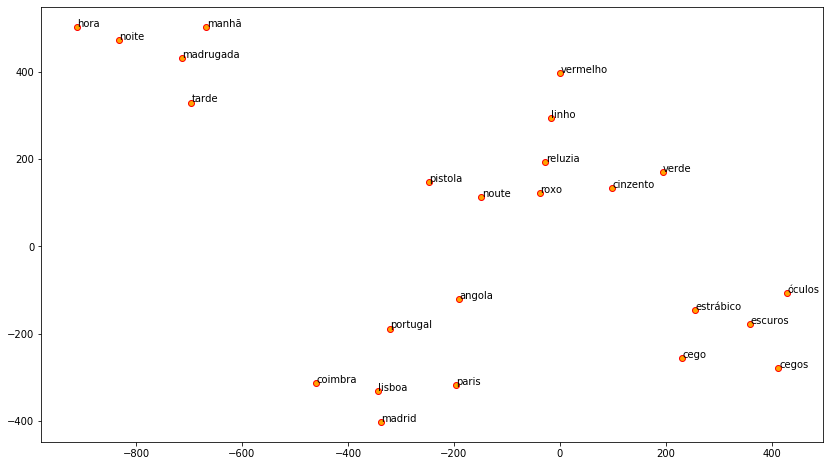

In [28]:
words = sum([[k] + v for k, v in similar_words.items()], [])
wvs = w2v_model.wv[words]
tsne = TSNE(n_components=2, random_state=0, n_iter=10000, perplexity=2)
np.set_printoptions(suppress=True)
T = tsne.fit_transform(wvs)
labels = words
plt.figure(figsize=(14, 8))
plt.scatter(T[:, 0], T[:, 1], c='orange', edgecolors='r')
for label, x, y in zip(labels, T[:, 0], T[:, 1]):
    plt.annotate(label, xy=(x+1, y+1), xytext=(0, 0), textcoords='offset points')

In [29]:
X_train, X_test, y_train, y_test = train_test_split(np.array(df_train_balanced.loc[:,'simple_clean']),
                                                    np.array(df_train_balanced.loc[:,'author_name']),
                                                    test_size=0.20,
                                                    random_state=42,
                                                    stratify=df_train_balanced.loc[:,'author_name'])

In [30]:
tokenized_train = [nltk.WordPunctTokenizer().tokenize(document) for document in X_train]
tokenized_test = [nltk.WordPunctTokenizer().tokenize(document) for document in X_test]
tokenized_final_test = [nltk.WordPunctTokenizer().tokenize(document) for document in df_test.loc[:,'simple_clean']]

In [31]:
def document_vectorizer(corpus, model, num_features):
    vocabulary = set(model.wv.index2word)
    
    def average_word_vectors(words, model, vocabulary, num_features):
        feature_vector = np.zeros((num_features,), dtype="float64")
        nwords = 0.
        for word in words:
            if word in vocabulary:
                nwords = nwords + 1.
                feature_vector = np.add(feature_vector, model.wv[word])
        if nwords:
            feature_vector = np.divide(feature_vector, nwords)
        return feature_vector
    
    features = [average_word_vectors(tokenized_sentence, model, vocabulary, num_features) 
                for tokenized_sentence in corpus]
    return np.array(features)

In [32]:
cbow_train = document_vectorizer(corpus=tokenized_train, model=w2v_model, num_features=100)
cbow_test = document_vectorizer(corpus=tokenized_test, model=w2v_model, num_features=100)
cbow_final_test = document_vectorizer(corpus=tokenized_final_test, model=w2v_model, num_features=100)

In [33]:
pipe = Pipeline([('classifier', MultinomialNB())])

In [34]:
search_space = [{'classifier': [MultinomialNB()],
                 'classifier__alpha': [1e-5, 1e-4, 1e-2, 1e-1, 1]},
                {'classifier': [LogisticRegression(penalty='l2', max_iter=100, random_state=42)],
                 'classifier__C': [1, 5, 10]},
                {'classifier': [LinearSVC(penalty='l2', random_state=42)],
                 'classifier__C': [0.01, 0.1, 1, 5]},
                {'classifier': [SGDClassifier(loss='hinge', penalty='l2', max_iter=5, random_state=42)]},
                {'classifier': [RandomForestClassifier(n_estimators=10, random_state=42)]},
                {'classifier': [GradientBoostingClassifier(n_estimators=10, random_state=42)]}]

In [35]:
clf = GridSearchCV(pipe, search_space, cv=5, verbose=2, n_jobs=-1)

In [36]:
clf = clf.fit(cbow_train, y_train)

Fitting 5 folds for each of 15 candidates, totalling 75 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done  75 out of  75 | elapsed:    3.8s finished


In [37]:
clf.best_estimator_.get_params()["classifier"]

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [38]:
prediction = clf.predict(cbow_test)

In [39]:
cm = metrics.confusion_matrix(y_test, prediction)
pd.DataFrame(cm, index=df_train.loc[:,'author_name'].unique(), columns=df_train.loc[:,'author_name'].unique())

,AlmadaNegreiros,CamiloCasteloBranco,EcaDeQueiros,JoseRodriguesSantos,JoseSaramago,LuisaMarquesSilva
AlmadaNegreiros,19,0,1,0,0,0
CamiloCasteloBranco,0,19,0,0,0,0
EcaDeQueiros,0,0,22,0,0,0
JoseRodriguesSantos,0,0,0,28,1,0
JoseSaramago,0,0,0,0,26,0
LuisaMarquesSilva,0,0,0,0,0,18


In [40]:
print(metrics.classification_report(y_test, prediction, digits=3))

                     precision    recall  f1-score   support

    AlmadaNegreiros      1.000     0.950     0.974        20
CamiloCasteloBranco      1.000     1.000     1.000        19
       EcaDeQueiros      0.957     1.000     0.978        22
JoseRodriguesSantos      1.000     0.966     0.982        29
       JoseSaramago      0.963     1.000     0.981        26
  LuisaMarquesSilva      1.000     1.000     1.000        18

           accuracy                          0.985       134
          macro avg      0.987     0.986     0.986       134
       weighted avg      0.986     0.985     0.985       134



In [39]:
clf.predict(cbow_final_test)

array(['JoseSaramago', 'AlmadaNegreiros', 'LuisaMarquesSilva',
       'EcaDeQueiros', 'CamiloCasteloBranco', 'JoseRodriguesSantos',
       'JoseSaramago', 'AlmadaNegreiros', 'LuisaMarquesSilva',
       'EcaDeQueiros', 'CamiloCasteloBranco', 'JoseRodriguesSantos'],
      dtype=object)

# RNN

In [141]:
high_frequency = df_train.author_name.isin(['JoseRodriguesSantos','JoseSaramago','CamiloCasteloBranco'])
medium_frequency = df_train.author_name.isin(['EcaDeQueiros'])
df_train_balanced = pd.concat([df_train.loc[high_frequency,:].iloc[::5,:],
                               df_train.loc[medium_frequency,:].iloc[::3,:],
                               df_train.loc[~(high_frequency | medium_frequency),:]]).sort_index().reset_index(drop=True)

In [142]:
df_train_balanced.author_name.value_counts()

JoseRodriguesSantos    463
JoseSaramago           407
CamiloCasteloBranco    310
EcaDeQueiros           299
AlmadaNegreiros         98
LuisaMarquesSilva       90
Name: author_name, dtype: int64

In [143]:
X_train, X_dev, y_train, y_dev = train_test_split(np.array(df_train_balanced.loc[:,'simple_clean']),
                                                  np.array(df_train_balanced.loc[:,'author_name'].astype('category').cat.codes),
                                                  test_size=0.2, 
                                                  random_state=42,
                                                  stratify=df_train_balanced.loc[:,'author_name'])

In [144]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)
X_train = tokenizer.texts_to_sequences(X_train)
X_train = pad_sequences(X_train, maxlen=500, truncating='post')
y_train = to_categorical(y_train)

In [145]:
model = Sequential()
model.add(Embedding(130000, 128))
model.add(LSTM(128, dropout=0.2))
model.add(Dense(6, activation="softmax"))
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [146]:
model.fit(X_train, y_train, batch_size=64, epochs=11)

Epoch 1/11
1333/1333 [==============================] - ETA: 30s - loss: 1.7929 - accuracy: 0.203 - ETA: 27s - loss: 1.7913 - accuracy: 0.203 - ETA: 25s - loss: 1.7889 - accuracy: 0.208 - ETA: 23s - loss: 1.7873 - accuracy: 0.222 - ETA: 22s - loss: 1.7852 - accuracy: 0.240 - ETA: 20s - loss: 1.7830 - accuracy: 0.239 - ETA: 19s - loss: 1.7793 - accuracy: 0.241 - ETA: 17s - loss: 1.7773 - accuracy: 0.236 - ETA: 16s - loss: 1.7736 - accuracy: 0.241 - ETA: 14s - loss: 1.7712 - accuracy: 0.240 - ETA: 13s - loss: 1.7665 - accuracy: 0.240 - ETA: 12s - loss: 1.7524 - accuracy: 0.239 - ETA: 10s - loss: 1.7473 - accuracy: 0.239 - ETA: 9s - loss: 1.7338 - accuracy: 0.246 - ETA: 7s - loss: 1.7261 - accuracy: 0.24 - ETA: 6s - loss: 1.7211 - accuracy: 0.25 - ETA: 5s - loss: 1.7181 - accuracy: 0.25 - ETA: 3s - loss: 1.7128 - accuracy: 0.26 - ETA: 2s - loss: 1.7118 - accuracy: 0.26 - ETA: 1s - loss: 1.7070 - accuracy: 0.26 - 28s 21ms/step - loss: 1.7051 - accuracy: 0.2596
Epoch 2/11
1333/1333 [=======

In [147]:
X_dev = tokenizer.texts_to_sequences(X_dev)
X_dev = pad_sequences(X_dev, maxlen=500, truncating='post')
y_dev = to_categorical(y_dev)

In [148]:
model.evaluate(X_dev, y_dev)

334/334 [==============================] - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - 1s 4ms/step


[1.0815331204208785, 0.7335329055786133]

In [149]:
X_test = np.array(df_test.loc[:,'simple_clean'])
X_test = tokenizer.texts_to_sequences(X_test)
X_test = pad_sequences(X_test, maxlen=500, truncating='post')

In [150]:
predicted = model.predict(X_test)
y_pred = np.argmax(predicted, axis=1)

In [151]:
dict_author = dict(zip(df_train.loc[:,'author_name'].astype('category').cat.codes, df_train.loc[:,'author_name']))

In [152]:
np.array([dict_author[i] for i in y_pred])

array(['JoseSaramago', 'CamiloCasteloBranco', 'JoseSaramago',
       'EcaDeQueiros', 'CamiloCasteloBranco', 'JoseRodriguesSantos',
       'JoseSaramago', 'CamiloCasteloBranco', 'JoseSaramago',
       'EcaDeQueiros', 'CamiloCasteloBranco', 'JoseRodriguesSantos'],
      dtype='<U19')

# CNN

In [129]:
high_frequency = df_train.author_name.isin(['JoseRodriguesSantos','JoseSaramago','CamiloCasteloBranco'])
medium_frequency = df_train.author_name.isin(['EcaDeQueiros'])
df_train_balanced = pd.concat([df_train.loc[high_frequency,:].iloc[::5,:],
                               df_train.loc[medium_frequency,:].iloc[::3,:],
                               df_train.loc[~(high_frequency | medium_frequency),:]]).sort_index().reset_index(drop=True)

In [130]:
df_train_balanced.author_name.value_counts()

JoseRodriguesSantos    463
JoseSaramago           407
CamiloCasteloBranco    310
EcaDeQueiros           299
AlmadaNegreiros         98
LuisaMarquesSilva       90
Name: author_name, dtype: int64

In [131]:
X_train, X_dev, y_train, y_dev = train_test_split(np.array(df_train_balanced.loc[:,'simple_clean']),
                                                  np.array(df_train_balanced.loc[:,'author_name'].astype('category').cat.codes),
                                                  test_size=0.2, 
                                                  random_state=42,
                                                  stratify=df_train_balanced.loc[:,'author_name'])

In [132]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)
X_train = tokenizer.texts_to_sequences(X_train)
X_train = pad_sequences(X_train, maxlen=500, truncating='post')
y_train = to_categorical(y_train)

In [133]:
X_dev = tokenizer.texts_to_sequences(X_dev)
X_dev = pad_sequences(X_dev, maxlen=500, truncating='post')
y_dev = to_categorical(y_dev)

In [134]:
model = Sequential()
model.add(Embedding(80000, 128))
model.add(Conv1D(filters=256, kernel_size=13, activation='relu'))
model.add(GlobalMaxPooling1D())
model.add(Dropout(0.5))
model.add(Dense(32,activation='relu'))
model.add(Dense(6, activation='softmax') )
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [135]:
model.fit(X_train, y_train, validation_data=(X_dev,y_dev), batch_size=64, epochs=5)

Train on 1333 samples, validate on 334 samples
Epoch 1/5
1333/1333 [==============================] - ETA: 14s - loss: 1.8238 - accuracy: 0.109 - ETA: 11s - loss: 1.8217 - accuracy: 0.125 - ETA: 10s - loss: 1.8210 - accuracy: 0.130 - ETA: 10s - loss: 1.8061 - accuracy: 0.164 - ETA: 9s - loss: 1.7959 - accuracy: 0.175 - ETA: 8s - loss: 1.7800 - accuracy: 0.20 - ETA: 8s - loss: 1.7762 - accuracy: 0.20 - ETA: 7s - loss: 1.7732 - accuracy: 0.20 - ETA: 6s - loss: 1.7687 - accuracy: 0.20 - ETA: 6s - loss: 1.7623 - accuracy: 0.21 - ETA: 5s - loss: 1.7570 - accuracy: 0.21 - ETA: 5s - loss: 1.7541 - accuracy: 0.22 - ETA: 4s - loss: 1.7467 - accuracy: 0.22 - ETA: 3s - loss: 1.7424 - accuracy: 0.23 - ETA: 3s - loss: 1.7418 - accuracy: 0.23 - ETA: 2s - loss: 1.7414 - accuracy: 0.23 - ETA: 2s - loss: 1.7380 - accuracy: 0.23 - ETA: 1s - loss: 1.7351 - accuracy: 0.24 - ETA: 1s - loss: 1.7328 - accuracy: 0.24 - ETA: 0s - loss: 1.7297 - accuracy: 0.24 - 13s 10ms/step - loss: 1.7277 - accuracy: 0.2476 -

In [136]:
model.evaluate(X_dev, y_dev)

334/334 [==============================] - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - 1s 2ms/step


[1.0512918226733179, 0.7604790329933167]

In [137]:
X_test = np.array(df_test.loc[:,'simple_clean'])
X_test = tokenizer.texts_to_sequences(X_test)
X_test = pad_sequences(X_test, maxlen=500, truncating='post')

In [138]:
predicted = model.predict(X_test)
y_pred = np.argmax(predicted, axis=1)

In [139]:
dict_author = dict(zip(df_train.loc[:,'author_name'].astype('category').cat.codes, df_train.loc[:,'author_name']))

In [140]:
np.array([dict_author[i] for i in y_pred])

array(['JoseSaramago', 'CamiloCasteloBranco', 'JoseSaramago',
       'EcaDeQueiros', 'CamiloCasteloBranco', 'JoseRodriguesSantos',
       'JoseSaramago', 'CamiloCasteloBranco', 'JoseRodriguesSantos',
       'EcaDeQueiros', 'CamiloCasteloBranco', 'JoseRodriguesSantos'],
      dtype='<U19')